In [1]:
!pip install xgboost

In [2]:
# 1.- Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn..ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import confusion_matrix, classification_report
#from xgboost.sklearn import XGBRegressor
#from sklearn.metrics import mean_absolute_error

In [3]:
# 2.-Importar DataSet
df = pd.read_csv("/home/chilis/Descargas/diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 3.- Transformar variables categoricas a variables numericas. No Aplica

In [5]:
# 4.- Verificar si hay valores NULL
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# 5.- EDA: EXPLORATORY DATA ANALYSIS: CORRELATION , HEATMAP , PAIRPLOT
df_corr = df.corr()
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

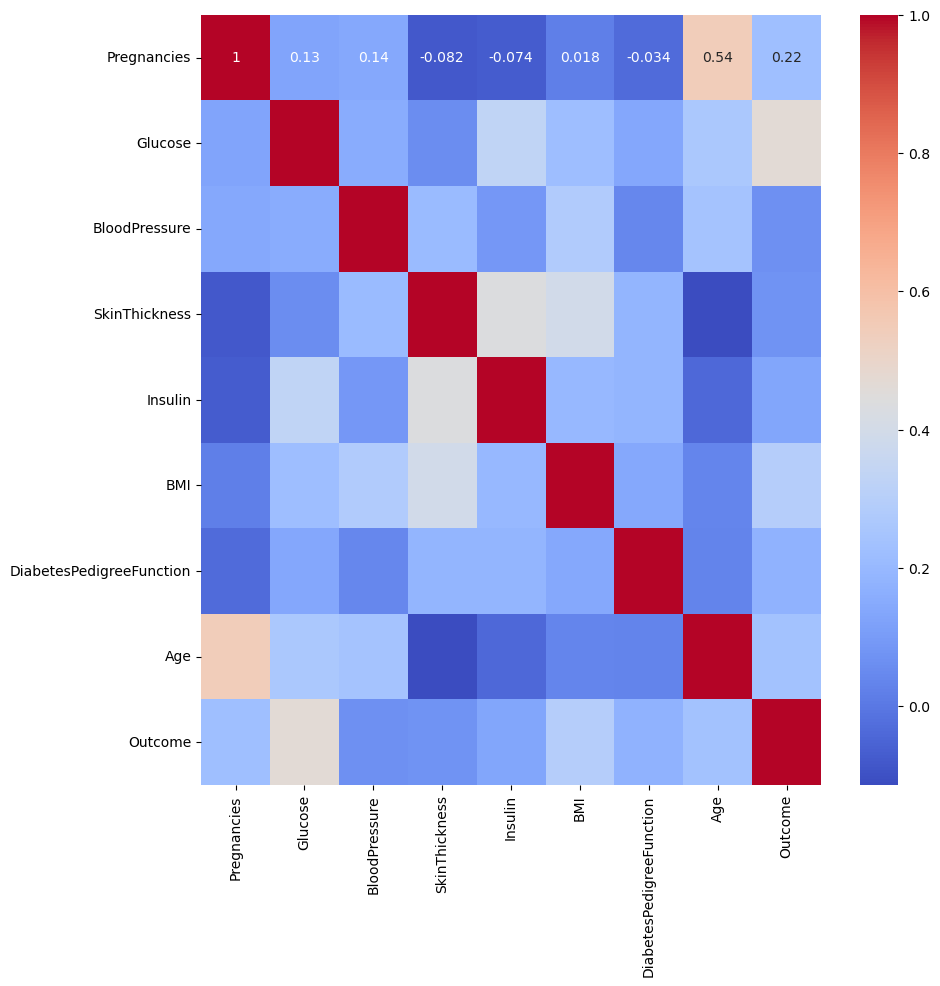

In [8]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_corr, annot = True , cmap = "coolwarm")

### 6.- Eliminar variables.
NO APLICA

In [9]:
# 7.- asignar "X" y "Y"
x = df.drop("Outcome", axis = 1)
y = df["Outcome"]

In [10]:
#8.-Dividir en training y test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42, shuffle = True)

In [12]:
#9.- Algoritmo a utilizar 
model = LogisticRegression(max_iter = 500)
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
#11.-PREDECIR
Obesidad = [
6,
148,
72,
35,
0,
33.6,
0.627,
50,
]

In [15]:
model.predict([Obesidad])

/home/chilis/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [16]:
predicciones = model.predict(x_test)
print(confusion_matrix(y_test, predicciones))
print(classification_report(y_test,predicciones))

[[78 21]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



# Matriz de Confusion

**Clasificacion predecible 0/1**
* **78**: Numero de verdaderos negativos (clase 0 correctamente clasificada).
* **21**: Numero de falsos positivos (clase 0 incorectamente clasificada como clase 1).
* **18**: Numero de falsos negativos (clase 1 correctamete clasificada como clase 0).
* **37**: Numero de verdaderos positivos (clase 1 correctamente clasificada).

**Metricas de desempeño:**
* Precision: La precision para una clase es la proporcion de predicciones correctas para esa clase.
* Recall: El recall para una clase es la proporcion de verdaderos positivos entre los casos reales de esa clase.
* F1_Score: El F1_Score es la media armonica de la precision y el recall. Es una metrica equilibrada que considera tanto la precision como el recall.
* Support: Es Support es el numero de ocurrencias reales de cada clase en el conjunto de datos de prueba.

**Metricas agregadas**
* Accuracy : La precision global de model.
* Macro Avg: Es el promedio de las metricas (precision, recall y F1_Score) calculado independientemente para
  cada clase y luego promediado. No tiene en cuenta el desequilibrio de clases.
* weighted Avg (promedio ponderado): Es similar al macro promedio , pero cada metrica se pondera por el numero sww instancias reales de cada clase (support), teniendo en cuenta el desequilibrio de clases.

 Una precision general del **75%**. Indica que el modelo es correcto en sus predicciones **75% del tiempo**.

In [17]:
# 1.- Importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn..ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import confusion_matrix, classification_report
#from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression #MODELO QUE VAMOS A USAR

In [18]:
# 2.-Importar DataSet
df = pd.read_csv("/home/chilis/Descargas/diabetes.csv")

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3:- Transformar variables categoricas a variables numericas.
En este caso No Aplica (NA).

In [20]:
# 4.- Verificar si hay valores NULL
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
# 5.- EDA: EXPLORATORY DATA ANALYSIS: CORRELATION , HEATMAP , PAIRPLOT
df_corr = df.corr()
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

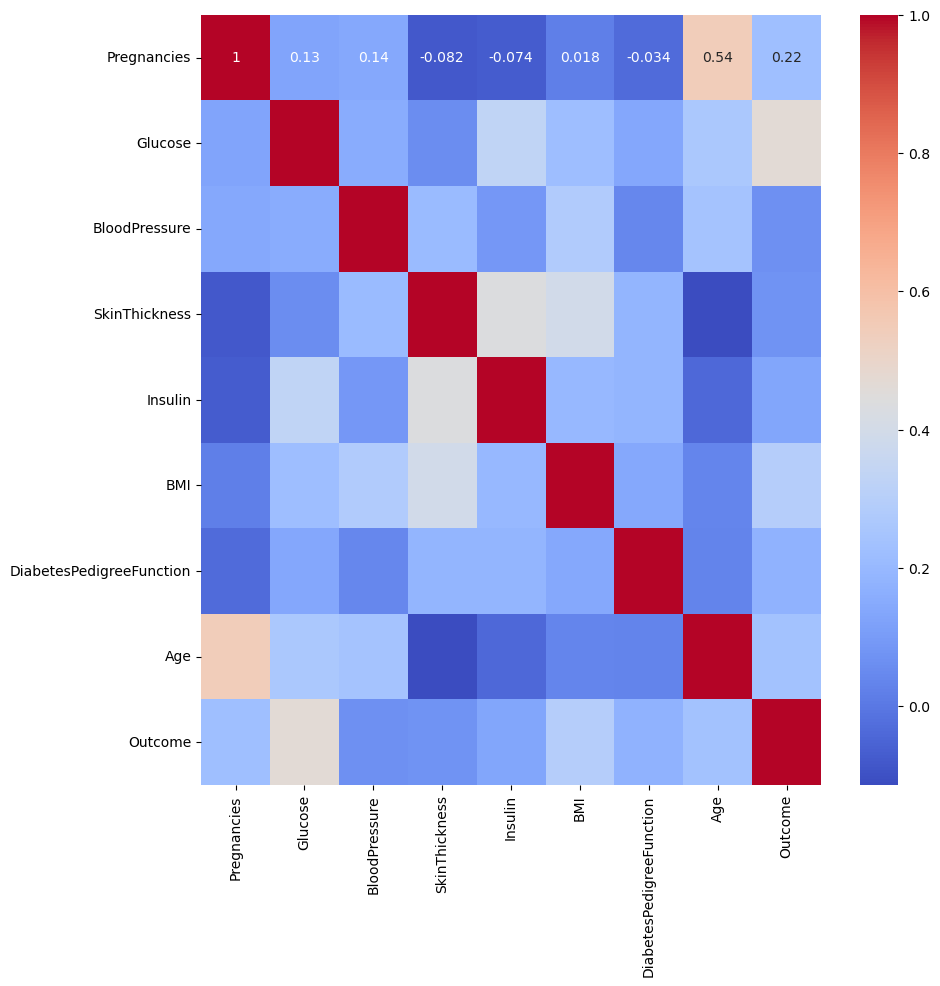

In [22]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_corr, annot = True , cmap = "coolwarm")

## 6.- Eliminar variables.
NO APLICA

In [23]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
# 7.- Asignar "X" y "Y"

x = df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
y = df[["Outcome"]]

In [28]:
#8.-Dividir en training y test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42, shuffle = True)

In [29]:
#9.- Algoritmo a utilizar 
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [30]:
# 10.- CO.INTERCEPTO Y COEF

model.intercept_
model.coef_

array([[ 0.01046818,  0.00563353, -0.00228103,  0.00053209, -0.00027815,
         0.01503864,  0.11126264,  0.00646027]])

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
#11.-PREDECIR
Obesidad = [
    6,
    148,
    72,
    35,
    0,
    33.6,
    0.627,
    50,
 ]

In [36]:
model.predict([Obesidad])

/home/chilis/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.70027923]])

In [38]:
# MEA MENOR ERROR ABSOLUTO 
# mean_ absolute_error
predicciones = model.predict(x_test)
predicciones

array([[ 0.33550028],
       [ 0.23809869],
       [ 0.1510522 ],
       [ 0.2401365 ],
       [ 0.48142376],
       [ 0.45257375],
       [-0.17450469],
       [ 0.60662287],
       [ 0.52417796],
       [ 0.70476953],
       [ 0.32360466],
       [ 0.85290601],
       [ 0.38466612],
       [ 0.36056948],
       [ 0.09946712],
       [ 0.41539557],
       [ 0.17869123],
       [ 0.07782301],
       [ 0.80730861],
       [ 0.51299477],
       [ 0.28090594],
       [ 0.08303057],
       [ 0.5099157 ],
       [ 0.11381771],
       [ 0.51325022],
       [ 0.82528549],
       [ 0.17892718],
       [-0.0594202 ],
       [ 0.28338572],
       [ 0.16407949],
       [ 0.83851225],
       [ 0.80737515],
       [ 0.68154389],
       [ 0.7649502 ],
       [ 0.56140297],
       [ 0.62123131],
       [ 1.06134554],
       [ 0.30990775],
       [ 0.51752336],
       [ 0.63691482],
       [ 0.07075333],
       [ 0.57757007],
       [ 0.55015462],
       [ 0.37541745],
       [-0.07644182],
       [ 0

In [39]:
MAE = mean_absolute_error(y_test, predicciones)


In [40]:
modelo = [LinearRegression()]
print("MAE ", MAE)

MAE  0.3481282599992824


0.3481282599992824 + 0.70027923 = **1** 
* Es el resultado de Salida para la persona con Diabetes.
